## Name: Kennedy Murithi
## Student pace: part time
## Instructor name: Samuel Jane

# Your code here - remember to use markdown cells for comments as well!

## HERE WE COME

# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
import pandas as pd
import numpy as np

In [2]:
# HERE WE WILL LOAD OR DATA FROM "tmdb.movies.csv.gz" OR  "tn.movie_budgets.csv.gz" OR
# 'imdb.title.ratings.csv.gz' as a CSV. 

df = pd.read_csv('imdb.title.ratings.csv.gz')

In [3]:
df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [4]:
df.shape

(73856, 3)

In [5]:
df.groupby('numvotes').median()

,averagerating
numvotes,
5,7.0
6,7.2
7,7.0
8,7.1
9,7.0
...,...
1183655,8.1
1211405,8.4
1299334,8.6


In [6]:
df.columns

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [8]:
df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [9]:
df.duplicated().value_counts()

False    73856
dtype: int64

In [10]:
##The code below changes the dtype  of the numvotes column
df['numvotes'] = df['numvotes'].astype(float)

In [11]:
#df[df.duplicated()]
#df = df[df.duplicated(subset=['averagerating','numvotes'], keep=False)]

In [12]:
df.drop_duplicates(subset=['averagerating'], keep="first", inplace=True)
df.duplicated().sum()

0

In [13]:
df.drop_duplicates(subset=['numvotes'], keep="first", inplace=True)
df.duplicated().sum()

0

In [14]:
df.isna().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

##We will go ahead to Data Visualisation where we will try to gain more insights from our data.

## We will import the neccessary tools below

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

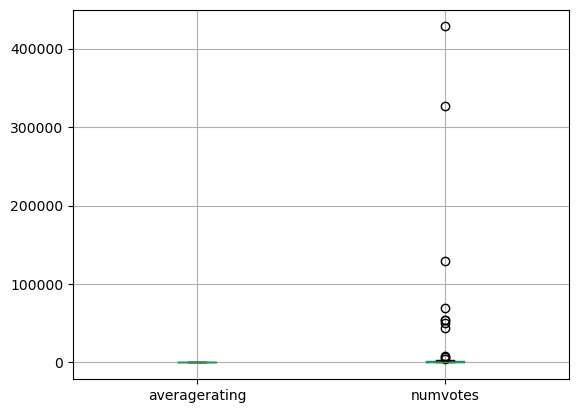

In [16]:
sub_value = ['averagerating','numvotes']
df.boxplot(sub_value);

###From the boxplot above we can deduce that our data columns contains a lot of outliers

##Thus we will go ahead to detecting them and then we remove them so that they don't corrupt our analysis

In [17]:
df['numvotes'].nunique()

72

In [18]:
df['averagerating'].nunique()

72

In [19]:
#df = drop_placeholders(df,'numvotes')

In [20]:
# This code below helps with detecting for placeholder values in the column
df.value_counts('averagerating')

averagerating
1.0    1
1.1    1
6.9    1
6.7    1
6.6    1
      ..
3.8    1
3.6    1
3.5    1
3.4    1
9.7    1
Length: 72, dtype: int64

In [53]:
def outliers(data,column):
  #IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
  ##create IQR
    IQR = q3 - q1
  #identify outlier
    outl= ((df[column]<(q1 - 1.5*IQR)) | (df[column]>(q3+1.5*IQR)))
  ##identify the outlier using index
    outl_list = list(outl[outl==True].index)
  ##identify the actual outliers using index
    outliers = []
    for x in outl_list:
        outliers.append(data[column][x])

    
    return outliers, q1, q3, IQR

In [54]:
outliers(df, 'averagerating')

([], 2.775, 7.4, 4.625)

In [55]:
#IQR
q1 = df['averagerating'].quantile(0.25)
q3 = df['averagerating'].quantile(0.75)
#create IQR
IQR = q3 - q1
IQR

4.625

In [56]:
df = df[~((df.averagerating<(q1-1.5*IQR))|(df.averagerating>(q3+1.5*IQR)))]
df

,tconst,averagerating,numvotes
0,tt10356526,8.3,31.0
1,tt10384606,8.9,559.0
2,tt1042974,6.4,20.0
4,tt1060240,6.5,21.0
5,tt1069246,6.2,326.0
8,tt1156528,7.2,265.0
13,tt1193623,8.0,5.0
14,tt1199588,5.5,74.0
18,tt1220911,5.0,941.0
32,tt1285219,3.4,387.0


In [57]:
#IQR
q1 = df['numvotes'].quantile(0.25)
q3 = df['numvotes'].quantile(0.75)
  #create IQR
IQR = q3 - q1
IQR

318.25

In [58]:
lower_limit = q1 - 1.5*IQR
upper_limit = q3 + 1.5*IQR
lower_limit,upper_limit

(-449.625, 823.375)

In [59]:
df = df[~((df['numvotes']<(q1-1.5*IQR)) | (df['numvotes']>(q3+1.5*IQR)))]
df.describe()

,averagerating,numvotes
count,51.000000,51.000000
mean,5.100000,187.705882
std,2.635147,218.857880
min,1.000000,5.000000
25%,2.750000,27.500000
50%,4.800000,74.000000
75%,7.500000,335.500000
max,9.700000,738.000000


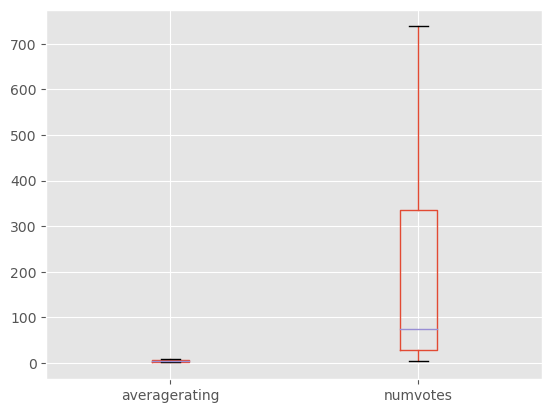

In [60]:
sub_value = ['averagerating','numvotes']
df.boxplot(sub_value);

## Univariate Data Analysis

In [29]:
import seaborn as sns

In [30]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [62]:
plt.style.use('ggplot')

In [63]:
print('Mean:', df['averagerating'].mean())
print('Median:', df['numvotes'].median())

Mean: 5.1000000000000005
Median: 74.0


In [64]:
df['averagerating'].describe()

count    51.000000
mean      5.100000
std       2.635147
min       1.000000
25%       2.750000
50%       4.800000
75%       7.500000
max       9.700000
Name: averagerating, dtype: float64

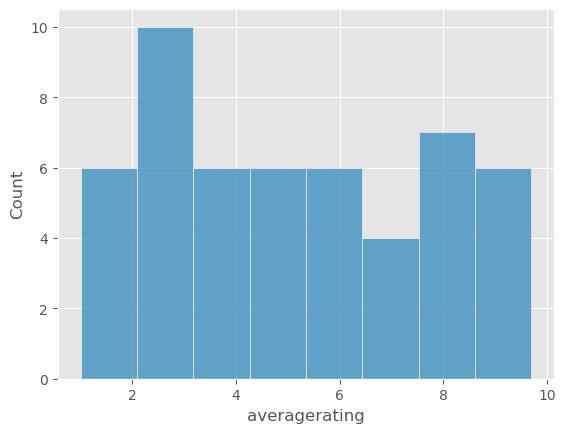

In [65]:
sns.histplot(x = 'averagerating', data = df, bins = 8);

In [66]:
df['numvotes'].describe()

count     51.000000
mean     187.705882
std      218.857880
min        5.000000
25%       27.500000
50%       74.000000
75%      335.500000
max      738.000000
Name: numvotes, dtype: float64

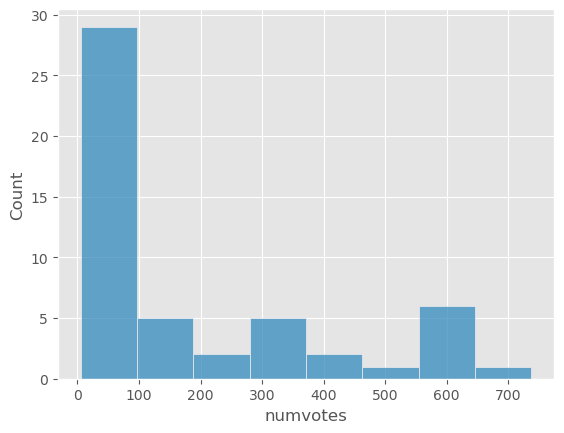

In [67]:
sns.histplot(x = 'numvotes', data = df, bins = 8);

##From our visualisation its evident that movies that had an average rating of lower than 5 had a higher count than those with higher ratings.

##    Bivariate Data Analysis

In [68]:
df.corr()

,averagerating,numvotes
averagerating,1.00000,-0.24411
numvotes,-0.24411,1.00000


<AxesSubplot:xlabel='averagerating', ylabel='numvotes'>

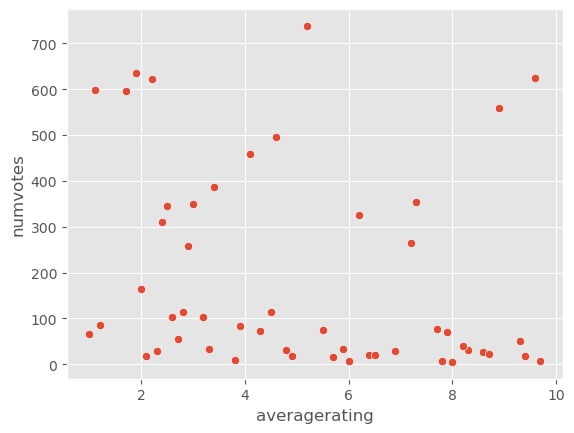

In [69]:
sns.scatterplot(data=df, x='averagerating', y='numvotes')

<AxesSubplot:xlabel='averagerating', ylabel='numvotes'>

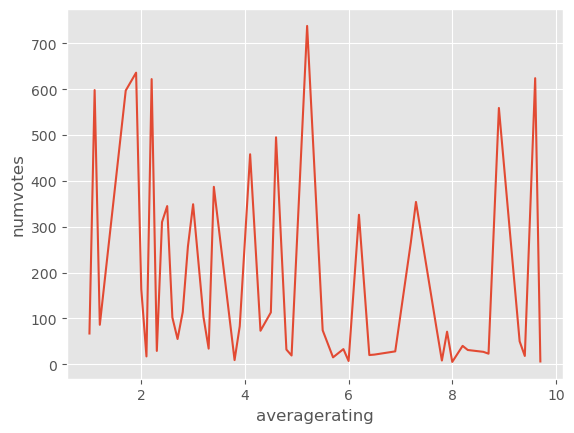

In [70]:
sns.lineplot(data=df, x='averagerating', y='numvotes')

In [71]:
columns = ['averagerating','numvotes']

<Figure size 960x720 with 0 Axes>

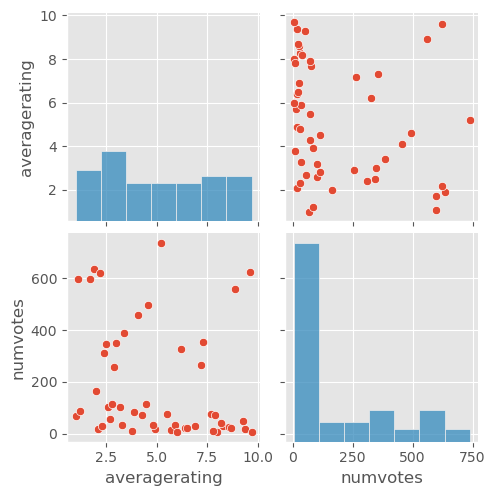

In [72]:
plt.figure(dpi=150)
sns.pairplot(df[columns])
plt.show()

## Conclusion:

In [42]:
## It's evident from our visualization that movies that had a lower average rating of below 5 had a bigger audience than 
## those that had higher ratings.

In [43]:
## It can also be seen that the movies that had a huge number of votes were from the first category of numvotes; that of 0-500

In [44]:
## Also if you would compare the number of votes with the average rating it gives a NO Correration

## Recommendations:

In [ ]:
##It can be recommendend from our analysis that when choosing a movie type to dwell on, it would be adviserable if one 
##didn't consider on obtaining a high rating and rather dwell on coming up with a script that best entertains the majority of 
##the people without having a lot of complexities for the viewers to unpack on.